<a href="https://colab.research.google.com/github/ovieimara/ITNPBD2/blob/master/Session7_Pandas_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITNPBD2 Representing and Manipulating Data
## Pandas Lab - Fitness Tracker Data: Solutions

In this practical, we will analyse data from a fitness tracking app. The data have been collected from various different users and stored in a single file. The data are a mixture of user profile data (username, date of birth, etc.) and activity records (swim distance, etc.). This means the profile data are repeated for every user for every activity they recorded. That is not very useful!

Worse, the columns are not appropriate for all activities. For example, the column `stroke` only has data when the user was swimming, otherwise it is empty.

You need to separate the data into different tables and then analyse it. You will be doing this with Pandas.

## Load the data into a Pandas data frame

After importing pandas, load the data file `fitness.csv`. Either copy it to a local folder from the course Canvas page or read it directly from the URL. Don't set an index column or data types yet - just load it and look at the first 10 rows. Print the length of the table (number of rows).

In [ ]:
import pandas as pd
fit=pd.read_csv("data/fitness.csv")
display(fit.head(10))
print("There are",len(fit),"rows")

,Date,Activity,Username,DOB,UserWeight,UserHeight,LocName,Address,Hours,Improves,...,Distance,Set,Exercise,Reps,Weight,Stroke,HandsFacing,HandWidth,Seconds,HandsWidth
0,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,1.0,Bench press,9.0,70.0,NaN,NaN,NaN,NaN,NaN
1,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,1.0,Bench press,9.0,70.0,NaN,NaN,NaN,NaN,NaN
2,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,2.0,Bench press,7.0,75.0,NaN,NaN,NaN,NaN,NaN
3,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,2.0,Bench press,7.0,75.0,NaN,NaN,NaN,NaN,NaN
4,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,3.0,Bench press,5.0,80.0,NaN,NaN,NaN,NaN,NaN
5,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,3.0,Bench press,5.0,80.0,NaN,NaN,NaN,NaN,NaN
6,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,1.0,Barbell Curl,8.0,10.0,NaN,NaN,NaN,NaN,NaN
7,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,1.0,Plank,NaN,NaN,NaN,NaN,NaN,60.0,NaN
8,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,2.0,Plank,NaN,NaN,NaN,NaN,NaN,60.0,NaN
9,01.01.2014,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,3.0,Plank,NaN,NaN,NaN,NaN,NaN,60.0,NaN


There are 6088 rows


# Fix the date columns.
## Two columns: DOB and Date contain dates. Convert them to the correct format

In [ ]:
fit['DOB'] = pd.to_datetime(fit['DOB'], format="%d.%m.%Y")
fit['Date'] = pd.to_datetime(fit['Date'], format="%d.%m.%Y")
fit.head()

,Date,Activity,Username,DOB,UserWeight,UserHeight,LocName,Address,Hours,Improves,...,Distance,Set,Exercise,Reps,Weight,Stroke,HandsFacing,HandWidth,Seconds,HandsWidth
0,2014-01-01,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,1.0,Bench press,9.0,70.0,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,1.0,Bench press,9.0,70.0,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,2.0,Bench press,7.0,75.0,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,2.0,Bench press,7.0,75.0,NaN,NaN,NaN,NaN,NaN
4,2014-01-01,Gym,ddbq2413,1979-09-09,76,157,PureGym,High Street,7am - 10pm,Strength,...,NaN,3.0,Bench press,5.0,80.0,NaN,NaN,NaN,NaN,NaN


# Find out what the different activities in the data are, and how often each one occurs

In [ ]:
display(fit.Activity.describe())
fit.groupby('Activity').Activity.count()

count     6088
unique       4
top        Gym
freq      4704
Name: Activity, dtype: object

Activity
Bike     352
Gym     4704
Run      304
Swim     728
Name: Activity, dtype: int64

# Let's start with some simple date extraction. Print each of these parts of the data:
## The column with usernames in it

In [ ]:
print(fit.Username)

0       ddbq2413
1       ddbq2413
2       ddbq2413
3       ddbq2413
4       ddbq2413
5       ddbq2413
6       ddbq2413
7       ddbq2413
8       ddbq2413
9       ddbq2413
10      ddbq2413
11      ddbq2413
12      ddbq2413
13      ddbq2413
14      ddbq2413
15      ddbq2413
16      ddbq2413
17      ddbq2413
18      ddbq2413
19      ddbq2413
20      ddbq2413
21      ddbq2413
22      ddbq2413
23      ddbq2413
24      ddbq2413
25      ddbq2413
26      ddbq2413
27      ddbq2413
28      ddbq2413
29      ddbq2413
          ...   
6058    nzvs3223
6059    nzvs3223
6060    nzvs3223
6061    nzvs3223
6062    nzvs3223
6063    nzvs3223
6064    nzvs3223
6065    nzvs3223
6066    nzvs3223
6067    nzvs3223
6068    nzvs3223
6069    nzvs3223
6070    nzvs3223
6071    nzvs3223
6072    nzvs3223
6073    nzvs3223
6074    nzvs3223
6075    nzvs3223
6076    nzvs3223
6077    nzvs3223
6078    nzvs3223
6079    nzvs3223
6080    nzvs3223
6081    nzvs3223
6082    nzvs3223
6083    nzvs3223
6084    nzvs3223
6085    nzvs32

## The row at index location 2

In [ ]:
print(fit.loc[2])

Date           2014-01-01 00:00:00
Activity                       Gym
Username                  ddbq2413
DOB            1979-09-09 00:00:00
UserWeight                      76
UserHeight                     157
LocName                    PureGym
Address                High Street
Hours                   7am - 10pm
Improves                  Strength
BodyPart                      Arms
Muscle                     Triceps
Minutes                        NaN
Distance                       NaN
Set                              2
Exercise               Bench press
Reps                             7
Weight                          75
Stroke                         NaN
HandsFacing                    NaN
HandWidth                      NaN
Seconds                        NaN
HandsWidth                     NaN
Name: 2, dtype: object


## Print all the data for user ddbq2413

In [ ]:
print(fit[fit.Username == 'ddbq2413'])

          Date Activity  Username        DOB  UserWeight  UserHeight  LocName  \
0   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
1   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
2   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
3   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
4   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
5   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
6   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
7   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
8   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
9   2014-01-01      Gym  ddbq2413 1979-09-09          76         157  PureGym   
10  2014-01-05      Gym  ddbq2413 1979-09-09          76         157  PureGym   
11  2014-01-05      Gym  ddb

## Calculate the average (mean) distance travelled for Swim, Bike and Run activities respectively. Use `groupby` to do this

In [ ]:
print(fit[fit.Activity.isin(['Swim','Bike','Run'])].groupby('Activity')['Distance'].mean())

Activity
Bike    22500.000000
Run      5236.842105
Swim      426.785714
Name: Distance, dtype: float64


## Extract user Data
You should see that columns 2,3,4 and 5 (from Username to UserHeight) are about the user and not the exercise.
- Find out how many different users there are

In [ ]:
print(fit.Username.unique())

['ddbq2413' 'hrfu1432' 'revz4142' 'fuqm1243' 'emvk3411' 'cswz4434'
 'nlgm4332' 'viqi3431' 'wzro1422' 'nzvs3223']


## Then create a new data frame with only the user data columns: username, Date of Birth (DOB), weight and height.
- Then drop all the duplicates to create a table with a single entry for each user
- Then set the index to be `Username`
- Display the whole list of users (it is short)

In [ ]:
users = fit[['Username','DOB','UserWeight','UserHeight']]
display(users.head())
single_users = users.drop_duplicates()
single_users.set_index('Username', inplace = True)
single_users

,Username,DOB,UserWeight,UserHeight
0,ddbq2413,1979-09-09,76,157
1,ddbq2413,1979-09-09,76,157
2,ddbq2413,1979-09-09,76,157
3,ddbq2413,1979-09-09,76,157
4,ddbq2413,1979-09-09,76,157


,DOB,UserWeight,UserHeight
Username,,,
ddbq2413,1979-09-09,76,157
hrfu1432,1962-09-13,88,173
revz4142,1979-09-09,79,147
fuqm1243,1974-09-10,75,172
emvk3411,1995-09-05,79,167
cswz4434,1995-09-05,79,158
nlgm4332,1952-09-15,71,127
viqi3431,1977-09-09,84,161
wzro1422,1976-09-09,83,165


# Now we need to extract the Swimming Data
- The columns you need are Date, Username, Distance, Set and Stroke
- You should only extract the rows where the Activity column equals Swim
- Extract them into a dataframe called `swims`
- Note that the `set` column allows the user to break one swim session into shorter sets, each of a different stroke. You should see each date has 1 or more sets.
- There will be duplicates in this set, so you must drop them too

In [ ]:
swims = fit[fit.Activity=='Swim'][['Date','Username','Distance','Set','Stroke']]
swims.drop_duplicates(inplace = True)
swims.head()

,Date,Username,Distance,Set,Stroke
146,2014-01-23,ddbq2413,375.0,1.0,Front Crawl
150,2014-01-23,ddbq2413,125.0,2.0,Breast stroke
154,2014-01-23,ddbq2413,250.0,3.0,Front Crawl
158,2014-01-23,ddbq2413,125.0,4.0,Breast stroke
263,2014-02-02,ddbq2413,1500.0,1.0,Breast stroke


## - Finally, set Username and Date as the two indices

In [ ]:
swims.set_index(['Username','Date'], inplace = True)
swims.head()

Distance  Set         Stroke
Date       Username                              
2014-01-23 ddbq2413     375.0  1.0    Front Crawl
           ddbq2413     125.0  2.0  Breast stroke
           ddbq2413     250.0  3.0    Front Crawl
           ddbq2413     125.0  4.0  Breast stroke
2014-02-02 ddbq2413    1500.0  1.0  Breast stroke

# One more extraction
## We won't bother separating out every activity, but we will do one more
- Make another frame called `Bike` with Date, Username, Distance and Minutes by selecting rows where activity is Bike
- Remember to remove duplicates and set the indices again

In [ ]:
bike = fit[fit.Activity=='Bike'][['Date','Username','Distance','Minutes']]
bike.drop_duplicates(inplace = True)
bike.head()
bike.set_index(['Username','Date'], inplace = True)
bike.head()

Distance  Minutes
Username Date                         
ddbq2413 2014-01-10   20000.0     63.0
         2014-01-11   10000.0     24.0
         2014-02-01   40000.0    102.0
         2014-03-03   40000.0    109.0
         2014-03-10   20000.0     51.0

## Assuming you set the index in the order Username, Date:
- Extract all the bike data for user `ddbq2413`
- Extract all the bike data for user `ddbq2413` on date `2014-01-10`

In [ ]:
print(bike.loc['ddbq2413'])
print(bike.loc['ddbq2413','2014-01-10'])

            Distance  Minutes
Date                         
2014-01-10   20000.0     63.0
2014-01-11   10000.0     24.0
2014-02-01   40000.0    102.0
2014-03-03   40000.0    109.0
2014-03-10   20000.0     51.0
2014-03-14   10000.0     21.0
2014-03-21   10000.0     22.0
2014-04-11   10000.0     22.0
2014-04-19   20000.0     49.0
2014-04-23   20000.0     44.0
Distance    20000.0
Minutes        63.0
Name: (ddbq2413, 2014-01-10 00:00:00), dtype: float64


# Now we will use only these new tables to answer some queries - don't use the original large data frame!
- Extract two columns: Userweight and Distance for all Swims by merging the Swim table with the Users table

In [ ]:
st = pd.merge(swims, single_users, how='left', on='Username')[['UserWeight','Distance']]
st.head()

,UserWeight,Distance
Username,,
ddbq2413,76,375.0
ddbq2413,76,125.0
ddbq2413,76,250.0
ddbq2413,76,125.0
ddbq2413,76,1500.0


# Finally, plot the UserWeight against Distance as a scatter plot
- Use a library that can plot directly from Pandas

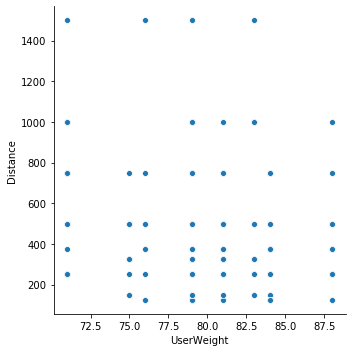

In [ ]:
import seaborn as sns
sns.relplot(data=st, x='UserWeight', y='Distance')